In [116]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
df = pd.read_excel('combined_cycle.xlsx')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [118]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [146]:
df_scale = scale(df)

In [149]:
num_rows, num_cols = df_scale.shape
print (num_rows, num_cols)

9568 5


In [120]:
df_scaled = pd.DataFrame(df_scale,columns=df_columns)

In [122]:
df_scaled.tail()

,AT,V,AP,RH,PE
9563,-0.402737,-0.363242,0.126450,1.211755,0.331944
9564,-0.867037,-1.190331,1.753131,-0.447205,0.893877
9565,1.565840,1.575811,-0.057099,-2.522618,-1.452881
9566,0.647976,1.191778,0.101191,-0.747901,-1.091345
9567,0.261507,0.646419,0.668677,-0.372545,-0.063577


In [123]:
#scaling data for principle component analysis

In [124]:
df_scaled.mean()

AT   -1.719813e-16
V    -2.600229e-16
AP    5.504864e-15
RH   -3.490855e-16
PE   -1.781940e-15
dtype: float64

In [125]:
df_scaled.std()

AT    1.000052
V     1.000052
AP    1.000052
RH    1.000052
PE    1.000052
dtype: float64

In [126]:
df_scaled.std(ddof=0)

AT    1.0
V     1.0
AP    1.0
RH    1.0
PE    1.0
dtype: float64

In [127]:
#verifying scaling mean is almost 0 and standard deviation is 1. The data frame is ready for Principal component analysis

In [128]:
df_scaled_pca = PCA().fit(df_scaled)

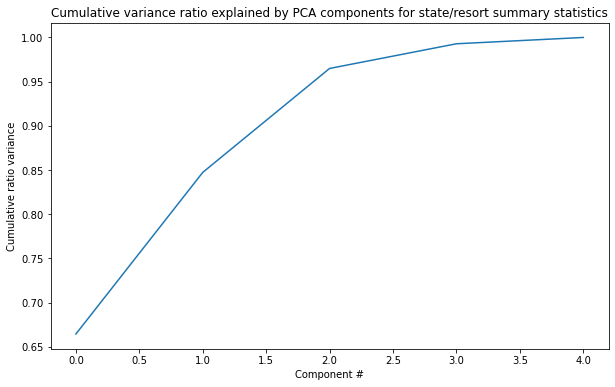

In [138]:
plt.subplots(figsize=(10, 6))
plt.plot(df_scaled_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

In [139]:
#The first two components explains over 95% of the variance

In [140]:
df_scaled_pca_x = df_scaled_pca.transform(df_scale)

In [141]:
df_scaled_pca_x.shape

(9568, 5)

In [145]:
df_scale

array([[-0.62951938, -0.98729659,  1.8204884 , -0.00951935,  0.52120807],
       [ 0.74190911,  0.68104512,  1.1418628 , -0.97462052, -0.58566442],
       [-1.95129733, -1.17301765, -0.18507756,  1.2898397 ,  2.00367889],
       ...,
       [ 1.56583973,  1.57581141, -0.05709854, -2.52261812, -1.45288056],
       [ 0.64797565,  1.19177803,  0.1011913 , -0.74790051, -1.09134518],
       [ 0.26150656,  0.64641916,  0.66867722, -0.37254534, -0.06357687]])

In [142]:
print(df_scale)

[[-0.62951938 -0.98729659  1.8204884  -0.00951935  0.52120807]
 [ 0.74190911  0.68104512  1.1418628  -0.97462052 -0.58566442]
 [-1.95129733 -1.17301765 -0.18507756  1.2898397   2.00367889]
 ...
 [ 1.56583973  1.57581141 -0.05709854 -2.52261812 -1.45288056]
 [ 0.64797565  1.19177803  0.1011913  -0.74790051 -1.09134518]
 [ 0.26150656  0.64641916  0.66867722 -0.37254534 -0.06357687]]


In [143]:
print(df_scaled_pca_x)

[[-1.69983999 -1.15977023 -0.68238554 -0.4986598   0.09022781]
 [ 0.9426987  -1.41914075 -0.83798838 -0.06433609 -0.04455602]
 [-2.98784018  1.05589888  0.63635382  0.66722483 -0.06288396]
 ...
 [ 3.13228307 -1.86097312  0.1035867   0.31509809  0.16829987]
 [ 1.68986026 -0.53460938 -0.54150279  0.2206069   0.34279578]
 [ 0.37594925 -0.66056015 -0.62219205  0.31372278 -0.11393946]]


In [144]:
x = df_scaled_pca_x[:, 0]
y = df_scaled_pca_x[:, 1]

In [136]:
print(x)

[-1.69983999  0.9426987  -2.98784018 ...  3.13228307  1.68986026
  0.37594925]


Text(0.5, 1.0, '84.7% variance explained')

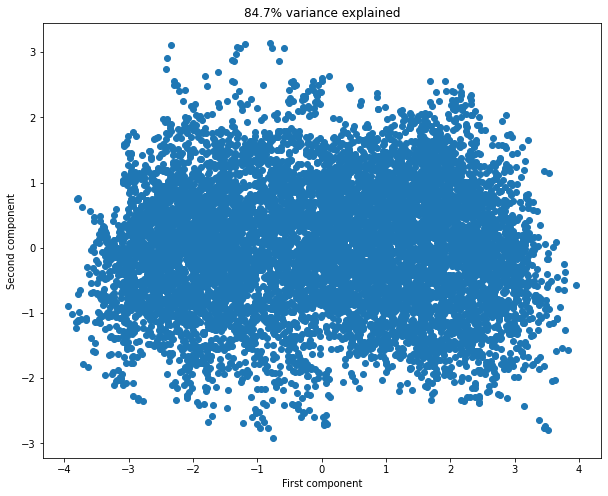

In [153]:
pc_var = 100 * df_scaled_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'{pc_var:.1f}% variance explained')

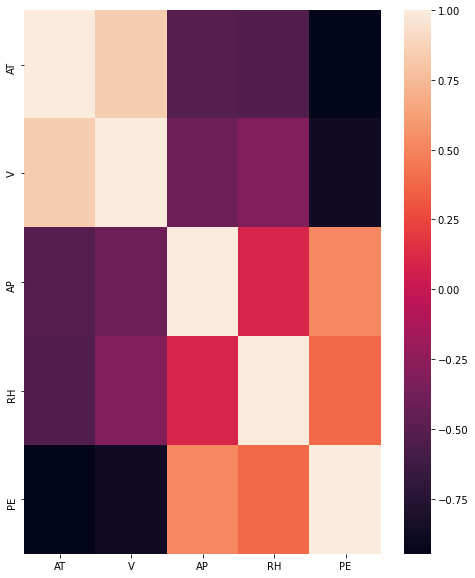

In [156]:
plt.subplots(figsize=(8,10))
sns.heatmap(df.corr());

Summary:
    
From the PCA analysis that two components can explain over 95% of the variance on the other hand from the heatmap we can
see that there is a strong correlation between electric energy output and relative humidity and ambient pressure.